In [19]:
# Important necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from __future__ import division

import matplotlib
from matplotlib import rc
rc('text', usetex=True)
rc('xtick.major', size=5, pad=7)
rc('xtick', labelsize=25)
rc('ytick.major', size=5, pad=7)
rc('ytick', labelsize=25)


matplotlib.rcParams['text.latex.preamble'] = [
    r'\usepackage{graphics,graphicx,rotating,amsmath}'
]

matplotlib.rcParams['font.serif'] = ['Computer Modern Roman'] + matplotlib.rcParams['font.serif']

%matplotlib inline  

In [2]:
from scipy.optimize import fsolve

In [65]:
gx = 1

branchingMC = 1/(3*6) 

cxn3000= .03951
cxn5000= .0103

factor=1
limcxn3000 = (4e-2 /(.47*.75)) *factor
limcxn5000 = (3e-3 /(.31*.75)) *factor

print(limcxn3000)
print(limcxn5000)

gx=1
gq3000= fsolve(lambda gq: limcxn3000 - cxn3000* gq**2. * (gq**2.*(3.*5.) / (gq**2.*(3.*6.) + gx**2.*(3.*2.)) ), .1)[0]
gq5000= fsolve(lambda gq: limcxn5000 - cxn5000* gq**2. * (gq**2.*(3.*5.) / (gq**2.*(3.*6.) + gx**2.*(3.*2.)) ), .1)[0]

print(gq3000)
print(gq5000)

lambda_3000 = 3000/gq3000
lambda_5000 = 5000/gq5000

0.113475177305
0.0129032258065
1.93716661491
1.3357202357


In [66]:
from pylab import rcParams
rcParams['figure.figsize'] = 9, 7

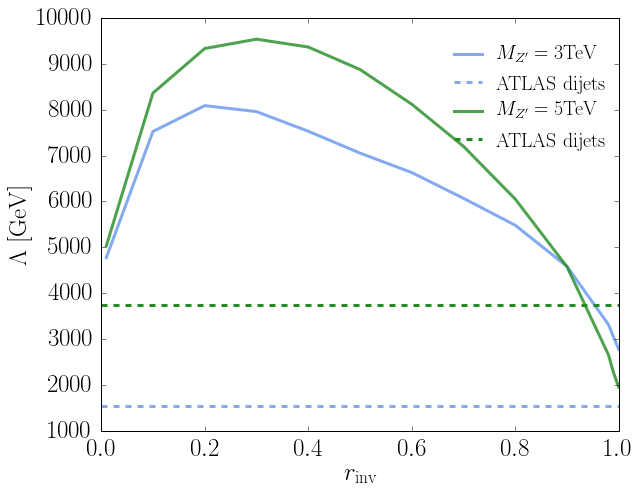

In [69]:
fig=plt.figure("m", figsize=(9,7))
plt.subplots_adjust(left=0.2, right=0.90, top=0.9, bottom=0.2)

scale0=3000
rinv=[.01,.1,.2,.3,.4,.5,.6,.7,.8,.9,.98,.99,1]
scale_factors=np.array([ 0.15564513,  0.02527245,  0.01893244,  0.02019902,  0.02519667,  0.03273068,
  0.0419513,   0.05981631,  0.08988458,  0.18375586,  0.670718,    0.95284694,
  1.37257313])
plt.plot(rinv, scale0/(scale_factors)**(1/4), color='cornflowerblue', lw=3, alpha=.8,label=r"$M_{Z^\prime} = 3 \textrm{TeV}$")
plt.axhline(lambda_3000, color='cornflowerblue', ls='--', lw=3, alpha=.8,
            label=r'$\textrm{ATLAS dijets}$')

scale0=5000
rinv=[.01,.1,.2,.3,.4,.5,.6,.7,.8,.9,.98,.99,1]
scale_factors=np.array([  0.97391459,   0.12782844,   0.08238268,   0.07555207,   0.08124163,
   0.10069225,   0.14384973,   0.23257467,   0.46647187,   1.42901618,
  12.56038663,  24.03941461,  43.66546503])
plt.plot(rinv, scale0/(scale_factors)**(1/4), color='forestgreen', lw=3,alpha=.8,label=r"$M_{Z^\prime} = 5 \textrm{TeV}$")
plt.axhline(lambda_5000, color='forestgreen', ls='--', lw=3, label=r'$\textrm{ATLAS dijets}$')

plt.legend(bbox_to_anchor=(0, 0, .99, 0.95),
           fontsize=20, ncol=1,frameon=False,
           handletextpad=.4, columnspacing=.8,
           borderaxespad=0.)


plt.xlim(0,1)
# plt.xscale("log")
plt.ylabel(r"$\Lambda\; [\textrm{GeV}]$",fontsize=25)
plt.xlabel(r"$r_\mathrm{inv}$",fontsize=25)

plt.tight_layout()
plt.savefig("mZ.pdf")